# Q1

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv('/home/student/Desktop/210962062/WEEK_6/salary.csv')
x = np.array(df['experience'].values).reshape(-1, 1)
y = np.array(df['salary'].values)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Applying SLR
model = LinearRegression()
model.fit(x_train, y_train)
intercept = model.intercept_
slope = model.coef_[0]
print("Intercept (B0):", intercept)
print("Slope (B1):", slope)

# Predict on the test data
y_pred = model.predict(x_test)

# Calculate MSE using y_test and y_pred
mse = mean_squared_error(y_test, y_pred)
print("MSE value is:", mse)


Intercept (B0): -0.02934947049924208
Slope (B1): 1.579425113464447
MSE value is: 0.027456969719163334


### a.

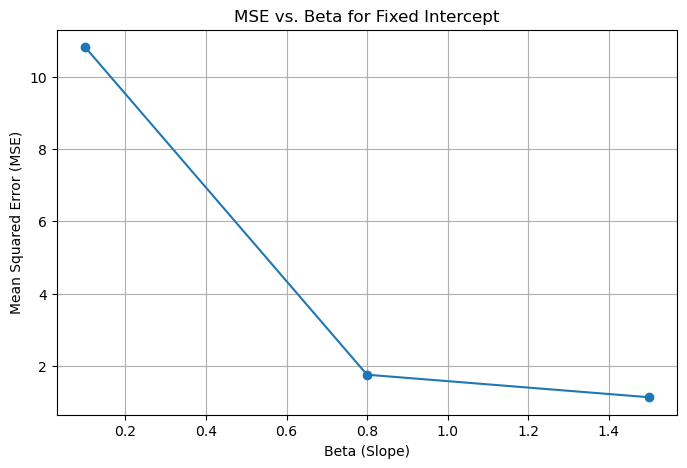

In [7]:
mses = []
betas = [0.1, 0.8, 1.5]
for beta in betas:
    y_new = 1.1 + x*beta
    mse = mean_squared_error(y, y_new)
    mses.append(mse)
plt.figure(figsize=(8, 5))
plt.plot(betas, mses, marker='o', linestyle='-')
plt.title('MSE vs. Beta for Fixed Intercept')
plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

### b.

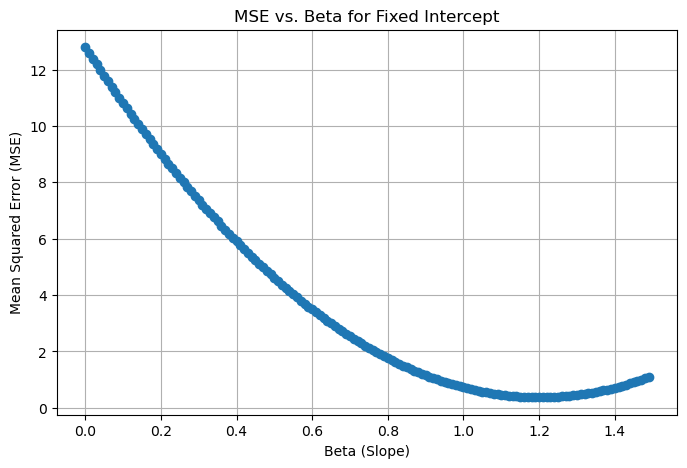

In [8]:
mses = []
betas = []
beta = 0
while beta<=1.5:
    y_new = 1.1 + x*beta
    mse = mean_squared_error(y, y_new)
    betas.append(beta)
    mses.append(mse)
    beta+=0.01
plt.figure(figsize=(8, 5))
plt.plot(betas, mses, marker='o', linestyle='-')
plt.title('MSE vs. Beta for Fixed Intercept')
plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

### c.

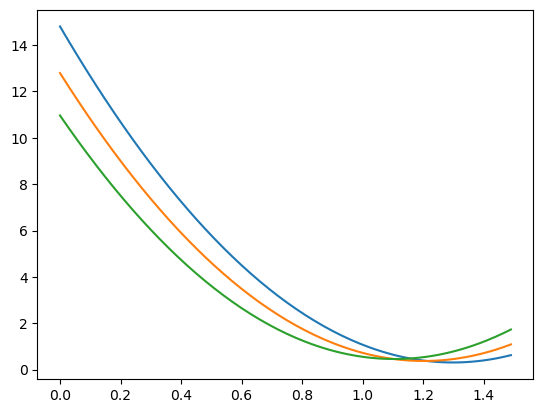

In [13]:
slope = [0.8, 1.1, 1.4]
for b in slope:
    mses = []
    betas = []
    beta = 0
    while beta<=1.5:
        y_new = b+beta*x
        mse = mean_squared_error(y, y_new)
        betas.append(beta)
        mses.append(mse)
        beta+=0.01
    plt.plot(betas, mses)

### d.

In [14]:
# Applying SLR
model = LinearRegression()
model.fit(x_train, y_train)
intercept = model.intercept_
slope = model.coef_[0]
print("Intercept (B0):", intercept)
print("Slope (B1):", slope)

# Predict on the test data
y_pred = model.predict(x_test)

# Calculate MSE using y_test and y_pred
mse = mean_squared_error(y_test, y_pred)
print("MSE value is:", mse)

Intercept (B0): -0.02934947049924208
Slope (B1): 1.579425113464447
MSE value is: 0.027456969719163334


# Q2

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
df = pd.read_csv('/home/student/Desktop/210962062/WEEK_6/salary.csv')
x = np.array(df['experience'].values).reshape(-1, 1)
y = np.array(df['salary'].values)
alpha = 0.01
b0 = 0 
b1 = 0
beta = []
ite = np.arange(60)
error = []
for j in range(0, 5):
    for i in range(0, 12):
        p = b0+b1*x[i]
        e = p-y[i]
        error.append(e)
        b0 = b0-(alpha*e)
        b1 = b1-(alpha*e*x[i])
        beta.append(b1)
print('B0: ',b0)
print('B1: ', b1)

B0:  [0.47495749]
B1:  [1.39382752]


### a.


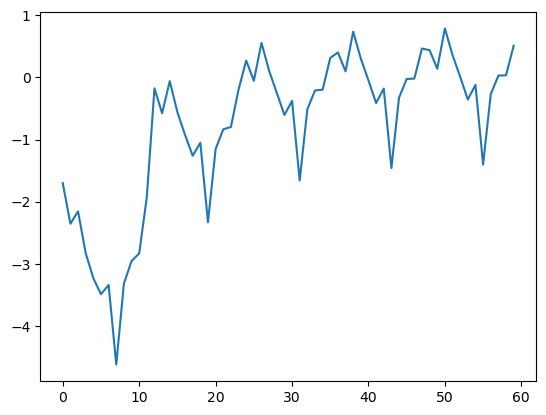

In [16]:
plt.plot(ite, error)

### b.

In [17]:
# Create an instance of the SGDRegressor
sgd = SGDRegressor(max_iter=5, learning_rate='constant', eta0=0.01, random_state=0)

# Initialize parameters
n_iterations = 5

# Stochastic Gradient Descent with scikit-learn
for iteration in range(n_iterations):
    sgd.partial_fit(experience.reshape(-1, 1), salary)
    y_pred = sgd.predict(experience.reshape(-1, 1))
    mse = mean_squared_error(salary, y_pred)
    
    # Print results for this iteration
    print(f'Iteration {iteration + 1} - B0: {sgd.intercept_[0]:.4f}, B1: {sgd.coef_[0]:.4f}, Error (MSE): {mse:.4f}')


Iteration 1 - B0: 0.3002, B1: 0.9938, Error (MSE): 2.1067
Iteration 2 - B0: 0.3843, B1: 1.2881, Error (MSE): 0.4311
Iteration 3 - B0: 0.4048, B1: 1.3762, Error (MSE): 0.2757
Iteration 4 - B0: 0.4066, B1: 1.4036, Error (MSE): 0.2590
Iteration 5 - B0: 0.4030, B1: 1.4131, Error (MSE): 0.2562


### c. 

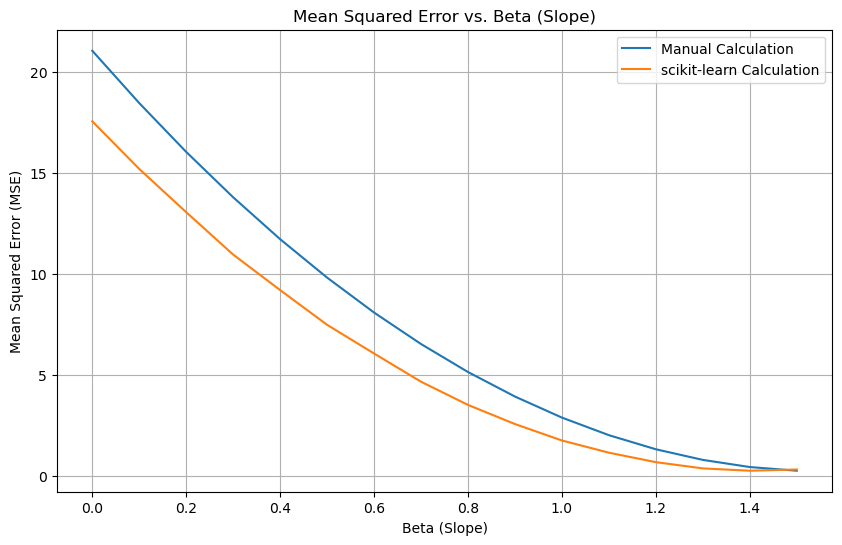

In [18]:
# Generate a range of beta (slope) values from 0 to 1.6 with a step of 0.1
beta_values = np.arange(0, 1.6, 0.1)

# Create empty lists to store MSE values for manual and scikit-learn calculations
mse_values_manual = []
mse_values_scikit = []

# Iterate through beta values and calculate MSE for each
for beta in beta_values:
    # Manual calculation of MSE
    y_pred_manual = beta * x
    mse_manual = mean_squared_error(y, y_pred_manual)
    mse_values_manual.append(mse_manual)
    
    # Create an SGDRegressor model with specified parameters
    sgd = SGDRegressor(alpha=0.01, max_iter=60)
    
    # Train the model on the data
    sgd.fit(x, y.ravel())
    
    # Update the model's coefficient (beta) to the current value
    sgd.coef_ = np.array([beta])
    
    predictions = sgd.predict(x)
    
    # Calculate the MSE using scikit-learn
    mse_scikit = mean_squared_error(y, predictions)
    mse_values_scikit.append(mse_scikit)

# Plot beta values against MSE values for manual and scikit-learn calculations
plt.figure(figsize=(10, 6))
plt.plot(beta_values, mse_values_manual, label="Manual Calculation")
plt.plot(beta_values, mse_values_scikit, label="scikit-learn Calculation")
plt.xlabel("Beta (Slope)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Mean Squared Error vs. Beta (Slope)")
plt.legend()
plt.grid(True)
plt.show()